In [ ]:
!git clone https://github.com/RajamannarAanjaram/EVA-6.git

In [ ]:
!pip install -U albumentations
!pip install -U torchsummary
!pip install -U grad-cam
!pip install -U ttach
!pip install -U torch-lr-finder

In [1]:
import sys
sys.path.append("./EVA-6/") 

In [2]:
from utils.DataLoader import Loader,mean_std,DeNorm
from src.custom_resnet import *
from src.optimise import *
from src.plots import Plots
import matplotlib.pyplot as plt
from utils.helper import get_mean_std
from torch_lr_finder import LRFinder
from torch.optim.lr_scheduler import OneCycleLR


from pytorch_grad_cam import GradCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


# import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [3]:
loader = Loader(batch_size=512)
train_transform,test_transform = loader.transform()
train_data,test_data = loader.Loader(train_transform,test_transform, cuda=False)

======> Computing mean and std of dataset
Files already downloaded and verified


100%|██████████| 390/390 [00:07<00:00, 50.66it/s]


Files already downloaded and verified
Files already downloaded and verified


## Model Creation & Training

In [16]:
model, summary = ModelLoader.modelsummary(version=[2,2,2,2],inputsize=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [4]:
model, summary = ModelLoader.modelsummary(inputsize=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
 CustomBasicBlock-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 256, 16, 16]         295,168
        MaxPool2d-13            [-1, 256, 8, 8]               0
      BatchNorm2d-14            [-1, 25

In [5]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [ ]:
(train_acc, train_losses, test_acc, test_losses), modelfinal,scheduled_lrs = learner(model,train_data,test_data,
                                                                       epochs=24,optimiser= 'Adam',
                                                                       scheduler=True,device = device)

  0%|          | 0/98 [00:00<?, ?it/s]

Epoch 1:


Loss=1.3255488872528076 Batch_id=97 Accuracy=44.81: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2241, Accuracy: 29340/50000 (58.68%)

Epoch 2:


Loss=1.0536190271377563 Batch_id=97 Accuracy=58.47: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3646, Accuracy: 29288/50000 (58.58%)

Epoch 3:


Loss=1.4940125942230225 Batch_id=97 Accuracy=62.95: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2424, Accuracy: 32562/50000 (65.12%)

Epoch 4:


Loss=0.9044066071510315 Batch_id=97 Accuracy=64.81: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0506, Accuracy: 32987/50000 (65.97%)

Epoch 5:


Loss=0.9340430498123169 Batch_id=97 Accuracy=70.10: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3204, Accuracy: 32203/50000 (64.41%)

Epoch 6:


Loss=0.7962889671325684 Batch_id=97 Accuracy=73.02: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6991, Accuracy: 38037/50000 (76.07%)

Epoch 7:


Loss=0.5998490452766418 Batch_id=97 Accuracy=75.05: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8447, Accuracy: 37212/50000 (74.42%)

Epoch 8:


Loss=0.6143016815185547 Batch_id=97 Accuracy=78.74: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4230, Accuracy: 42782/50000 (85.56%)

Epoch 9:


Loss=0.5174098610877991 Batch_id=97 Accuracy=79.74: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s] 
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4427, Accuracy: 42289/50000 (84.58%)

Epoch 10:


Loss=0.5649438500404358 Batch_id=97 Accuracy=80.84: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s] 
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3804, Accuracy: 43324/50000 (86.65%)

Epoch 11:


Loss=0.44581350684165955 Batch_id=97 Accuracy=82.24: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4000, Accuracy: 43043/50000 (86.09%)

Epoch 12:


Loss=0.5203299522399902 Batch_id=97 Accuracy=83.30: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s] 
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2771, Accuracy: 45252/50000 (90.50%)

Epoch 13:


Loss=0.4236239492893219 Batch_id=97 Accuracy=85.02: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s] 
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2258, Accuracy: 46131/50000 (92.26%)

Epoch 14:


Loss=0.5394148826599121 Batch_id=97 Accuracy=85.64: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s] 
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.1735, Accuracy: 47037/50000 (94.07%)

Epoch 15:


Loss=0.32538342475891113 Batch_id=97 Accuracy=86.88: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.1549, Accuracy: 47317/50000 (94.63%)

Epoch 16:


Loss=0.4038628935813904 Batch_id=97 Accuracy=88.00: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s] 
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.1196, Accuracy: 48069/50000 (96.14%)

Epoch 17:


Loss=0.3152308464050293 Batch_id=62 Accuracy=88.86:  63%|██████▎   | 62/98 [00:20<00:11,  3.13it/s] 

## Learning  Rate Curves

In [ ]:
Plots.plot_lr_curve(scheduled_lrs)

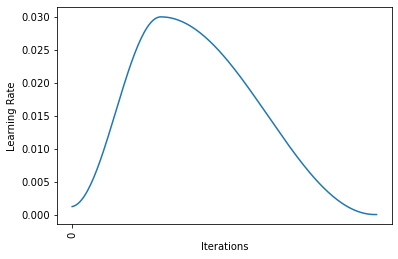

In [37]:
Plots.plot_lr_curve(scheduled_lrs)

## Loss Curves

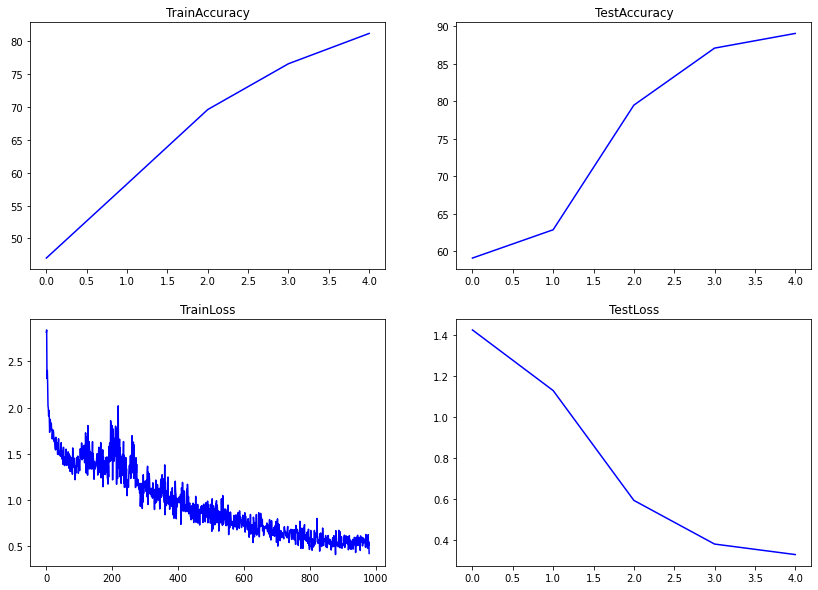

In [8]:
Plots.stat_graph(train_acc, train_losses, test_acc, test_losses)

## Misclassifications

Total wrong predictions are 5482


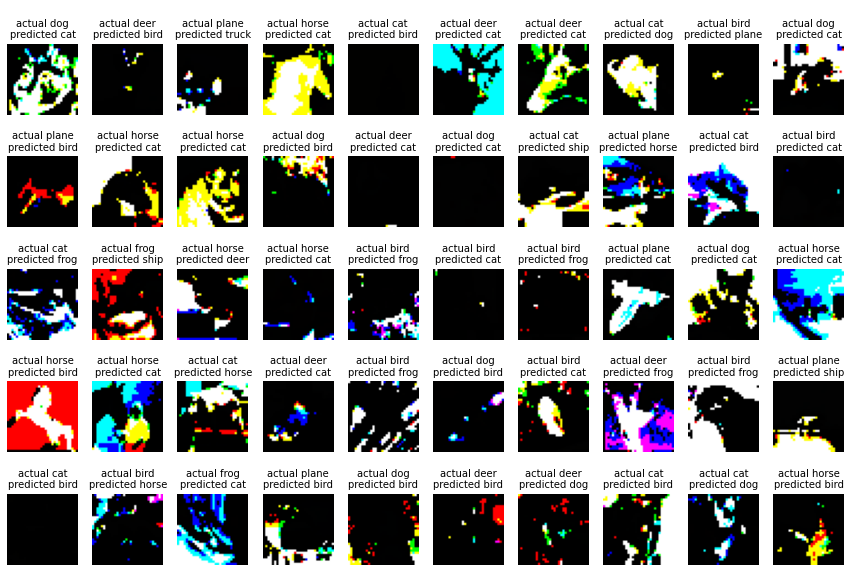

In [9]:
Plots.miscImages(modelfinal,test_data,device)
plt.show()

## Class Level Accuracy

In [10]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_data:
        images, labels = data
        images = images["image"].to(device)
        labels = labels.to(device)
        outputs = modelfinal(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 97 %
Accuracy of   car : 97 %
Accuracy of  bird : 85 %
Accuracy of   cat : 74 %
Accuracy of  deer : 82 %
Accuracy of   dog : 82 %
Accuracy of  frog : 93 %
Accuracy of horse : 95 %
Accuracy of  ship : 92 %
Accuracy of truck : 92 %


## CAM Visualization

In [11]:
# using layer 3 as it's 8x8 in width & height
target_layer = model.layer3[-1]

# Construct the CAM object once, and then re-use it on many images:
cam =  GradCAM(model=model, target_layer=target_layer, use_cuda=device)
denorm = DeNorm()

======> Computing mean and std of dataset
Files already downloaded and verified


100%|██████████| 390/390 [00:04<00:00, 85.51it/s] 


In [12]:
for idx in range(0,10) :
    Plots.plot_grad_cam(cam,images[idx:idx+1],None,denorm)
    

Exception: The input image should np.float32 in the range [0, 1]

<Figure size 576x576 with 0 Axes>